In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dari perintah df.isnull().sum() => ditemukan keanehan pada kolom skinthickness dan insulin maka kita cek dengan cara berikut.

In [6]:
df[['Glucose','BloodPressure','SkinThickness','BMI']] = df[['Glucose','BloodPressure','SkinThickness','BMI']].replace(0,np.NaN)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
# MENGISI MISSING VALUE 
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df[['Glucose','BloodPressure','SkinThickness','BMI']] = df[['Glucose','BloodPressure','SkinThickness','BMI']].replace(0,np.NaN)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

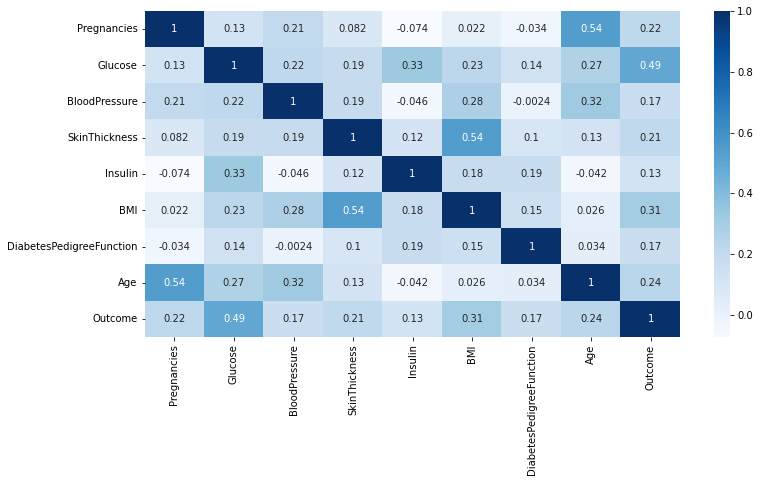

In [12]:
plt.figure(figsize=(12,6))
# matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


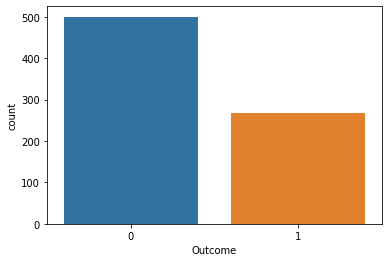

In [14]:
sns.countplot(df['Outcome'], label="Count")

In [15]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=42)


In [18]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
x_train = model.fit_transform(x_train)
x_test = model.fit_transform(x_test)

In [29]:
def models(x_train,y_train):
  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression(max_iter=200)
  lr.fit(x_train,y_train)

  from sklearn.ensemble import RandomForestClassifier
  rf = RandomForestClassifier()
  rf.fit(x_train,y_train)

  from xgboost import XGBClassifier
  xgb = XGBClassifier()
  xgb.fit(x_train,y_train)

  print('Lr: ', lr.score(x_train,y_train))
  print('Rf: ', rf.score(x_train,y_train))
  print('xGB: ', xgb.score(x_train,y_train))

  return lr,rf,xgb

In [30]:
model = models(x_train,y_train)

Lr:  0.7877094972067039
Rf:  1.0
xGB:  0.9143389199255121


In [31]:
y_pred = model[1].predict(x_test)
print(y_pred)

[0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 0 0]


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
for i in range(len(model)):
  print('Model: ', i)
  print('Accuracy: ', accuracy_score(y_pred, model[i].predict(x_test)))
  print(classification_report(y_pred, model[i].predict(x_test)))
  print(confusion_matrix(y_pred, model[i].predict(x_test)))

Model:  0
Accuracy:  0.9090909090909091
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       150
           1       0.92      0.81      0.86        81

    accuracy                           0.91       231
   macro avg       0.91      0.89      0.90       231
weighted avg       0.91      0.91      0.91       231

[[144   6]
 [ 15  66]]
Model:  1
Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        81

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

[[150   0]
 [  0  81]]
Model:  2
Accuracy:  0.9307359307359307
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       150
           1       0.90      0.90      0.90        81

    accuracy                   

Text(51.0, 0.5, 'y_true')

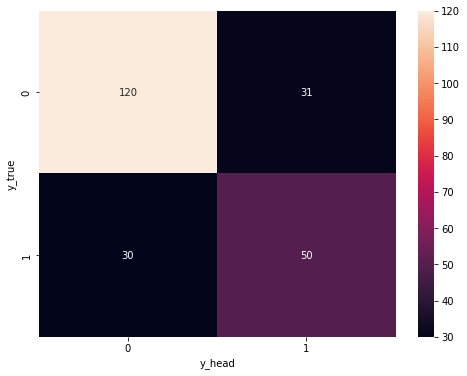

In [35]:
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")

